### Part 1: Exploring the Dataset

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, Subset
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import random
import math

In [8]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [9]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # create'figures' folder if it doesn't exist
    figures_dir = 'figures'
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)
    
    # construct the file path
    path = os.path.join(figures_dir, f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    
    # save the figure to the specified path
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
def plot_and_save_train_test_count(counts,class_labels,title="plot"):
    """
    Function to plot training and testing class counts.
    Args:
    counts: Dict of class as keys and counts as values.
    class_labels: Class labels for the train and test dataset.
    title: Title for the plot.
    """
    
    plt.figure(figsize=(10,3))
    
    ax = plt.gca() 

    #remove all the lines from the figure
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False) 

    ax.set_yticks([]) 
    ax.set_yticklabels([])
    
    norm = plt.Normalize(
        min(counts.values()), 
        max(counts.values())
    )
    cmap=cm.viridis
    counts_list = list(counts.values())
    #barplot
    x = np.arange(len(counts.keys()))
    plt.bar(x,counts.values(),
            color=cmap(norm(counts_list)
                      ))
    for index,value in enumerate(counts_list):
        plt.text(index-.25, value*1.02,
                 s=value, 
                 color="k")
    plt.ylim([0,max(counts.values())*1.1])
    plt.xticks(ticks=x,
               labels=[class_labels[key] for key in list(counts.keys())],
               rotation=45)
    plt.title("Number of {} instances from each class".format(title))
    save_fig("{}_counts".format(title))
    plt.show()


In [11]:
def plot_multiple_datapoints(dataset,class_labels,filename,number_of_points=9):
    """
    Plots multiple random datapoints for a given dataset
    Args:
    dataset: The dataset to plot from.
    class_labels: Labels for the classes to improve readability.
    filename: Save the figure as.
    """
    np.random.seed(42)
    fig = plt.figure(figsize=(9, 9))
    rows, cols = math.floor(number_of_points/2), math.ceil(number_of_points/2)
    
    for i in range(1, rows * cols + 1):
        random_idx = np.random.choice(np.arange(len(dataset)))
        img, label = dataset[random_idx]
        fig.add_subplot(rows, cols, i)
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, 
                                (1, 2, 0)), 
                                cmap="gray")
        if isinstance(label, torch.Tensor):
            plt.title(class_labels[label.item()])
        else:
            plt.title(class_labels[label])
        plt.axis(False)
        save_fig(filename)

In [12]:
# transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset
train_dataset = FashionMNIST(root='./data', train=True, download=True,transform=transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True,transform=transform)

In [13]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [14]:
# Load the FashionMNIST dataset
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Class labels in FashionMNIST
class_labels = train_dataset.classes

# categories to keep
selected_classes = ["T-shirt/top", "Trouser", "Pullover", "Sneaker", "Bag", "Ankle boot"]
selected_class_indices = [class_labels.index(cls) for cls in selected_classes]
selected_class_indices

[0, 1, 2, 7, 8, 9]

In [15]:
#count train and test occurences per class.
train_counts = Counter([label for _, label in train_dataset])
test_counts = Counter([label for _, label in test_dataset])

In [16]:
print("Number of training instances : {} \nNumber of test instances : {}".format(sum(list(train_counts.values())),
                                                                                 sum(list(test_counts.values()))))

Number of training instances : 60000 
Number of test instances : 10000


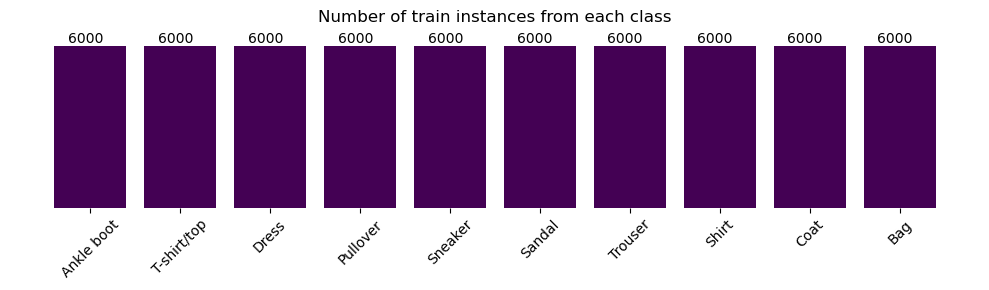

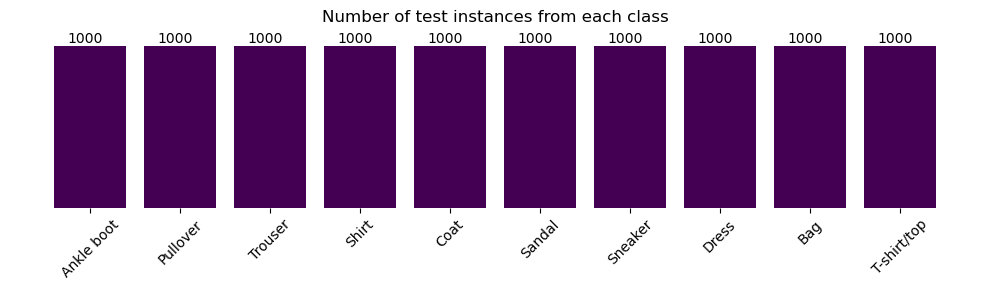

In [17]:
plot_and_save_train_test_count(train_counts,title="train",class_labels=class_labels)
plot_and_save_train_test_count(test_counts, title="test",class_labels=class_labels)

#### Visualising the data

Image shape: torch.Size([1, 28, 28])


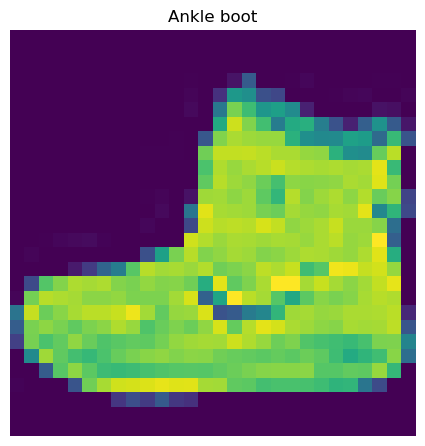

In [18]:
image, label = train_dataset[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap=cm.viridis)# image shape is [1, 28, 28] (colour channels, height, width)
plt.title(class_labels[label])
save_fig("first_data_point")
plt.axis(False)
plt.show()

#### Visualise Random Pictures

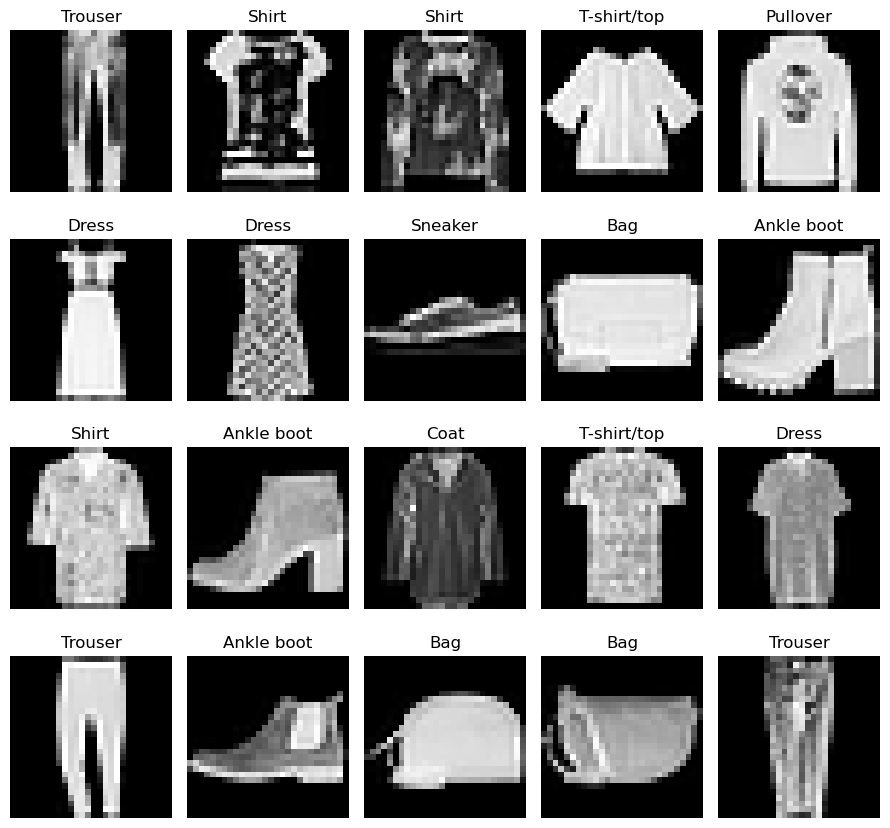

In [19]:
plot_multiple_datapoints(train_dataset, class_labels, filename="train_data_points")

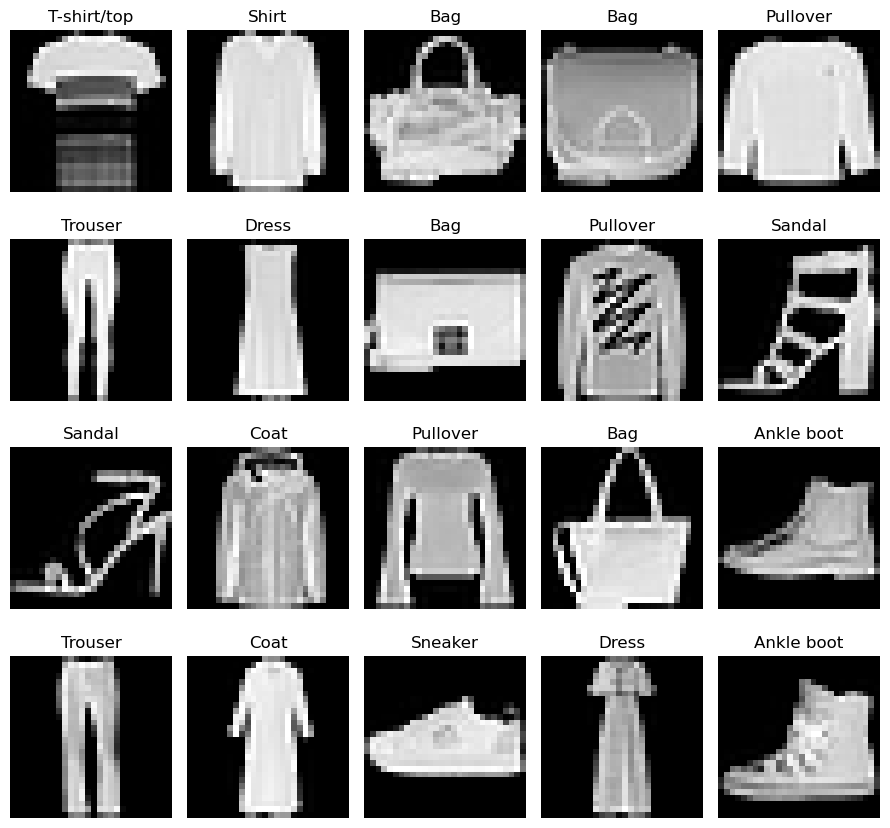

In [20]:
plot_multiple_datapoints(test_dataset, class_labels, filename="test_data_points")

In [21]:
train_restricted_counts = {key:value for key,value in train_counts.items() if key in selected_class_indices}
test_restricted_counts = {key:value for key,value in  test_counts.items() if key in selected_class_indices}

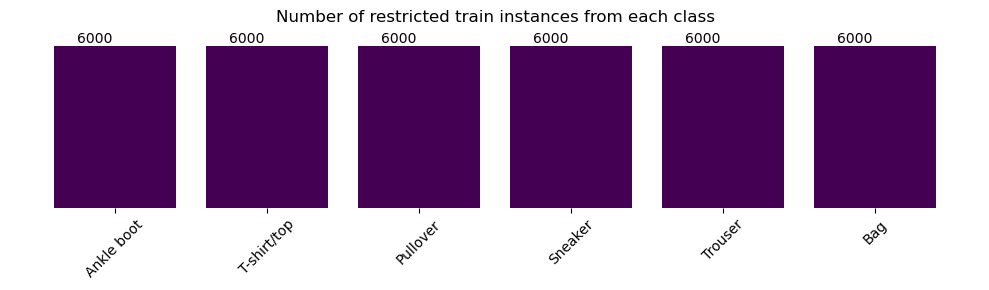

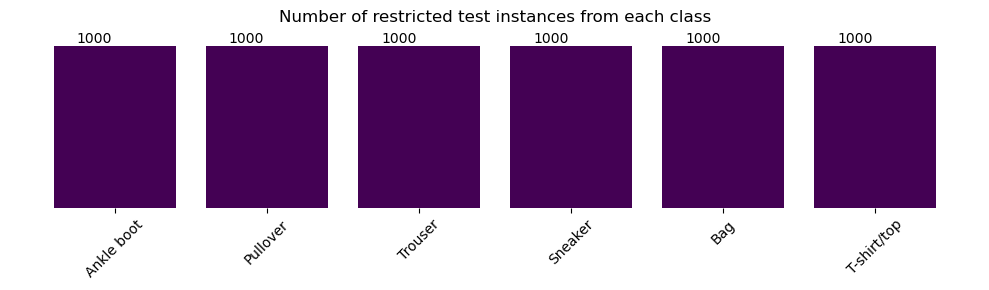

In [22]:
plot_and_save_train_test_count(train_restricted_counts, title="restricted train",class_labels=class_labels)
plot_and_save_train_test_count(test_restricted_counts, title="restricted test",class_labels=class_labels)

In [23]:
print("Number of Restricted training instances : {} \nNumber of Restricted test instances : {}".format(sum(list(train_restricted_counts.values())),
                                                                                                           sum(list(test_restricted_counts.values()))))

Number of Restricted training instances : 36000 
Number of Restricted test instances : 6000


### Part 2: Define a Dataset Class

In [24]:
from fmnist import FMNIST

In [25]:
transform= transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])
train_dataset_sc = FMNIST(selected_classes = selected_classes,
                       train=True,
                       transform=transform,
                       download=False)
test_dataset_sc = FMNIST(selected_classes=selected_classes,
                       train=False,
                       transform=transform,
                       download=False)

In [26]:
print("Number of train samples from restricted classes : {}".format(len(train_dataset_sc)))
print("Number of test samples from restricted classes : {}".format(len(test_dataset_sc)),"\n")
print(f"""Train Label Dict : {train_dataset_sc.label_dict}
Test Label Dict : {test_dataset_sc.label_dict}\n""")
print(f"""Train Class to Index : {train_dataset_sc.class_to_index}
Test Class to Index : {test_dataset_sc.class_to_index}\n""")
print(f"""Train Dataset : {train_dataset_sc.train}
Train Dataset: {test_dataset_sc.train}""")

Number of train samples from restricted classes : 36000
Number of test samples from restricted classes : 6000 

Train Label Dict : {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Sneaker', 4: 'Bag', 5: 'Ankle boot'}
Test Label Dict : {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Sneaker', 4: 'Bag', 5: 'Ankle boot'}

Train Class to Index : {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Sneaker': 3, 'Bag': 4, 'Ankle boot': 5}
Test Class to Index : {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Sneaker': 3, 'Bag': 4, 'Ankle boot': 5}

Train Dataset : True
Train Dataset: False


In [27]:
train_dataset_sc.targets.numpy()

array([5, 0, 0, ..., 4, 1, 0])

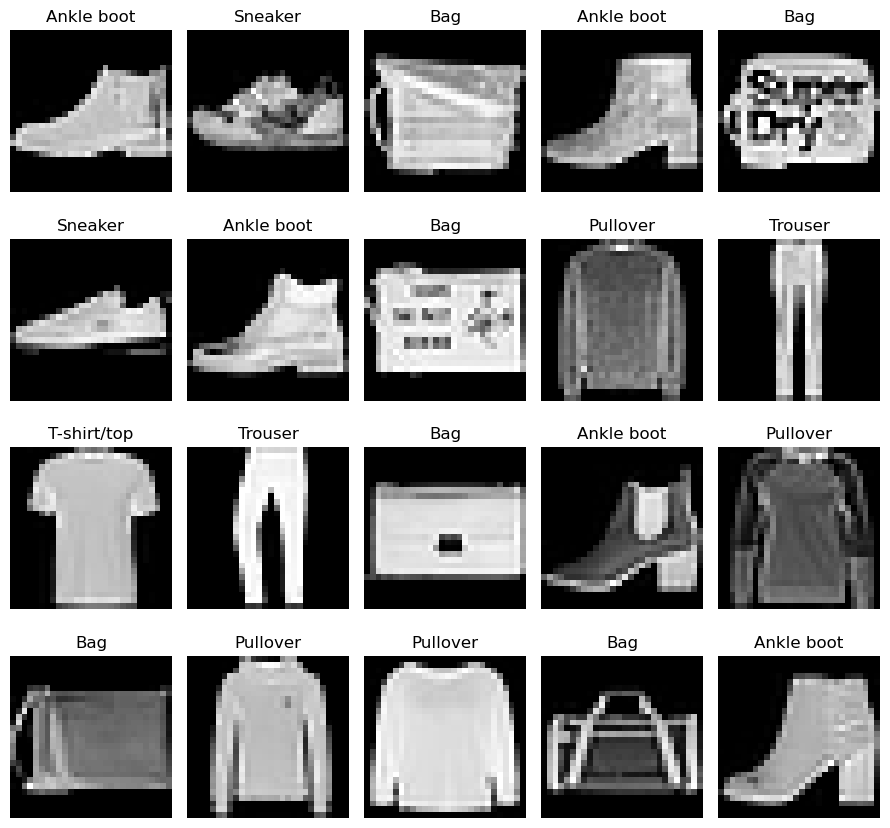

In [28]:
plot_multiple_datapoints(train_dataset_sc,train_dataset_sc.label_dict,"dataset_class_train_points")

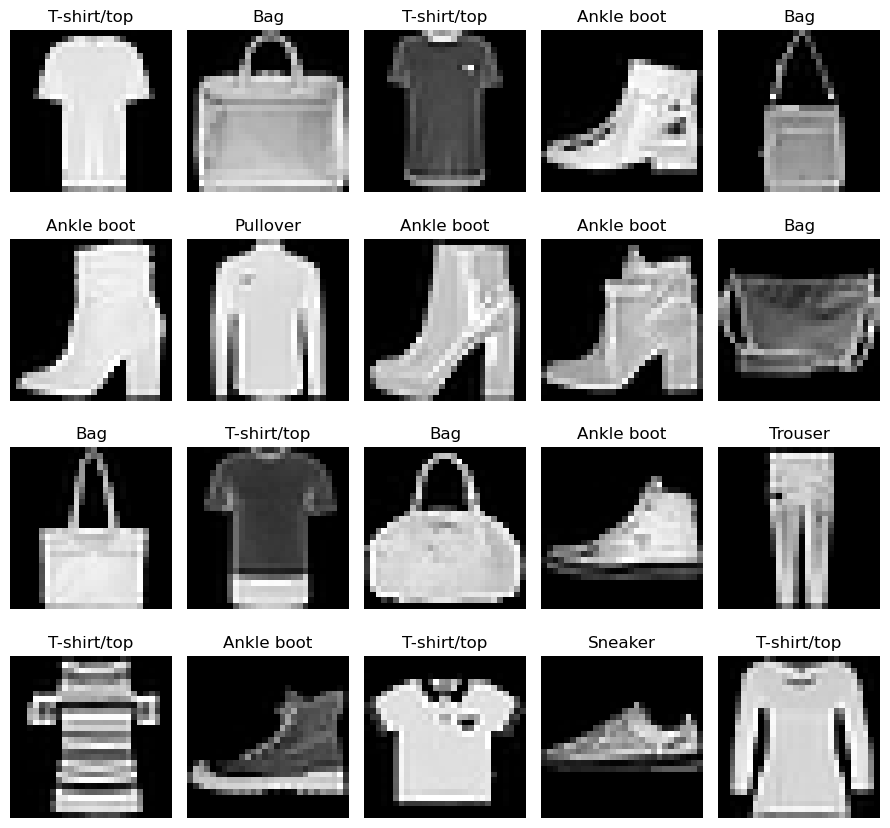

In [29]:
plot_multiple_datapoints(test_dataset_sc,test_dataset_sc.label_dict,"dataset_class_test_points")

### Running *project_main.py*

In [37]:
%run project_main.py --train --model_type cnn_v2 --epochs 20

Epoch 0: 100%|██████████| 1126/1126 [19:32<00:00,  1.04s/it, loss=0.138, v_num=0]


/opt/conda/envs/advanced-python/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:441: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | CNN_v2           | 78.8 K
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
78.8 K    Trainable params
0         Non-trainable params
78.8 K    Total params
0.315     Total estimated model params size (MB)


/opt/conda/envs/advanced-python/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/conda/envs/advanced-python/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 19: 100%|██████████| 1126/1126 [00:20<00:00, 55.09it/s, loss=0.00551, v_num=2]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 1126/1126 [00:20<00:00, 55.06it/s, loss=0.00551, v_num=2]
